In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [36]:
df=pd.read_csv("wieght.csv")


In [37]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [38]:
#scaatter plot 


Text(0, 0.5, 'Wight')

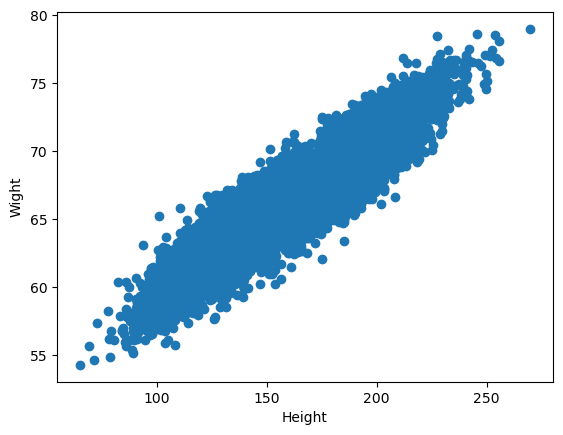

In [39]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Height")
plt.ylabel("Wight")

In [40]:
df.drop("Gender",axis=1, inplace=True)

In [41]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


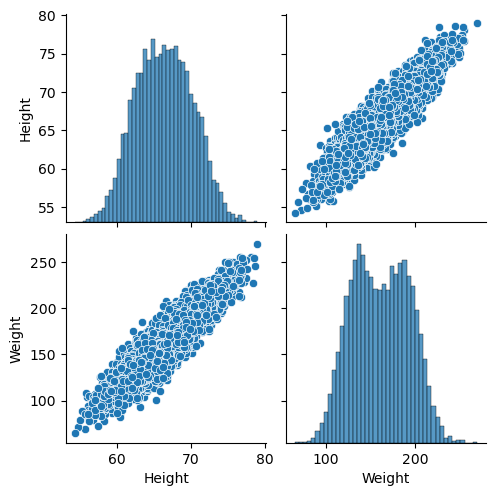

In [42]:
import seaborn as sns
sns.pairplot(df)

In [43]:
##Independent and dependent features
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [44]:
X=df[['Weight']]
y=df['Height']

In [45]:
X_series=df['Weight']
np.array(X_series).shape

(10000,)

In [46]:
np.array(y).shape

(10000,)

In [47]:
#train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [48]:
X_train.shape

(7500, 1)

In [49]:
#standandrisation 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [50]:
X_train

array([[-0.04659659],
       [ 1.34251968],
       [-0.34628208],
       ...,
       [-0.13835268],
       [ 0.56699643],
       [-0.33884025]], shape=(7500, 1))

In [52]:
X_test=scaler.transform(X_test)

In [53]:
X_test

array([[ 0.37115893],
       [ 1.05964173],
       [ 0.28064585],
       ...,
       [-1.16697743],
       [ 0.1278561 ],
       [ 0.05862451]], shape=(2500, 1))

In [54]:
#apply simple linear\ regression
from sklearn.linear_model import LinearRegression

In [59]:
regression=LinearRegression(n_jobs=1)

In [62]:
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [63]:
#coefficient or slope
regression.coef_

array([3.5520765])

In [64]:
regression.intercept_

np.float64(66.34834766149207)

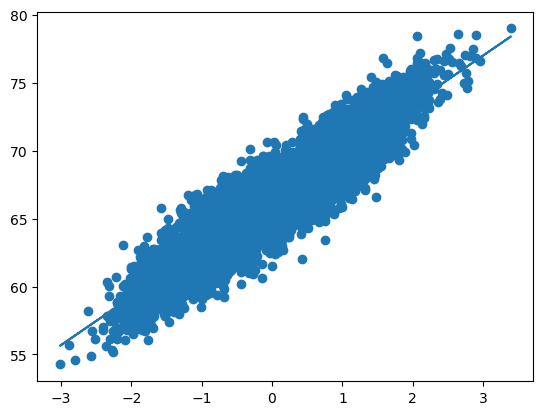

In [65]:
##plot the training data for best fit lLinearRegression
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [66]:
##prediction for tests data
y_pred=regression.predict(X_test)

In [67]:
##performanece metrix 

from sklearn.metrics import mean_absolute_error,mean_squared_error


In [68]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.124500293128046
1.1618686241050298
1.457566565590761


In [69]:
# R square  formula

from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
print(score)

0.857428881104187


In [75]:
pip install statsmodels   

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 19.6 MB/s  0:00:0012.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] 1/2 [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [76]:
##ols mestaticmethod

import statsmodels.api as sm

In [78]:
model=sm.OLS(y_train,X_train).fit()

In [79]:
prediction=model.predict(X_test)
print(prediction)

[ 1.3183849   3.7639285   0.99687554 ... -4.1451931   0.45415466
  0.20823876]


In [82]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Sat, 21 Feb 2026   Prob (F-statistic):                    3.63e-06
Time:                        20:59:08   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
##coffiecient is same fir all technique same.
ols and sk learn work in trhe same way as they produce the same value of intercept values

In [85]:
regression.predict(scaler.transform([[72]]))

/opt/homebrew/Cellar/jupyterlab/4.4.7/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([56.45016021])